<a href="https://colab.research.google.com/github/TienLungSun/PyTorch-Colab/blob/main/999%20Keypoints%20RCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
use_cuda = torch.cuda.is_available()
if use_cuda:
    device   = torch.device("cuda")
    print(torch.cuda.get_device_name(0))
else:
    device = torch.device("cpu")

Tesla T4


In [ ]:
import torchvision
model = torchvision.models.detection.keypointrcnn_resnet50_fpn(pretrained=True)
model.to(device)
model.eval()

Downloading: "https://download.pytorch.org/models/keypointrcnn_resnet50_fpn_coco-fc266e95.pth" to /root/.cache/torch/hub/checkpoints/keypointrcnn_resnet50_fpn_coco-fc266e95.pth


KeypointRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(640, 672, 704, 736, 768, 800), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256)
          (relu): ReLU(inplace=Tr

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving play RRO 2.0-short.mp4 to play RRO 2.0-short.mp4


In [ ]:
fnameLst = list(uploaded.keys())
fname = fnameLst[0]
print(fname)

play RRO 2.0-short.mp4


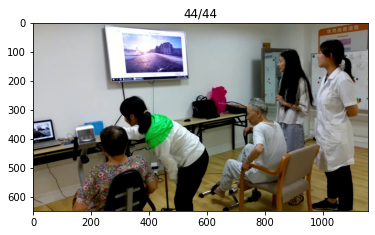

In [ ]:
# take a look at the input video
import cv2
import imageio
import matplotlib.pyplot as plt
from IPython import display

cap = cv2.VideoCapture(fname)
total_frames = int(cap.get(7))
vid = imageio.get_reader(fname, 'ffmpeg')
print('No. of frames = ', total_frames)
frame_count = 1
try:
  while(frame_count <= total_frames):
    display.clear_output(wait=True)
    plt.title(str(frame_count)+'/'+str(total_frames))
    frame = vid.get_data(frame_count)  # Capture frame-by-frame
    frame_count += 1
    plt.imshow(frame)
    plt.pause(0.1)
except:
    print("Read video error!")

# 加上 pose estimation

In [ ]:
#          'nose'白色, 'left_eye'黑色, 'right_eye', 'left_ear', 'right_ear',  
#          'left_shoulder',  'right_shoulder', 'left_elbow', 'right_elbow', 'left_wrist', 'right_wrist',
#          'left_hip', 'right_hip', 'left_knee', 'right_knee', 'left_ankle', 'right_ankle'
#           Left -  Green
#           Right - Red
colorMap = [(255, 255, 255), (0, 0, 0), (0, 0, 0), (255, 255, 255),(255, 255, 255), 
            (0, 255, 0), (255, 0, 0), (0, 255, 0), (255, 0, 0), (0, 255, 0), (255, 0, 0),
            (0, 255, 0), (255, 0, 0), (0, 255, 0), (255, 0, 0), (0, 255, 0), (255, 0, 0)]

In [ ]:
# 畫線 0 (nose)-3(LEar), 0-4, ...
PtPairLst = [[0,3], [0, 4], [5, 6], [5, 7], [7, 9], [6, 8], [8, 10], [11, 13], [13, 15], [11, 12], [12, 14], [14, 16]]

In [ ]:
# keyPts = the 17 key points of this person (x1, y1, visiablity1), ...
# frame = the image to draw the skeleton
def draw_skeleton(frame_count, frame, keyPts):
    frame_Lst = [frame_count]
    for i in range(17):
        x = keyPts[i][0]
        y = keyPts[i][1]
        cv2.circle(frame, (x, y), radius=10, color=colorMap[i], thickness=10) 
        frame_Lst = frame_Lst + [x, y]

    # 多畫 2 個點: 5 (LShoulder)-6 (RS) 中間,  11(LHip)-12(RH) 中間
    x5_6, y5_6, visiablity1  = (keyPts[5] + keyPts[6])/2
    x11_12, y11_12, visiablity2  = (keyPts[11] + keyPts[12])/2
    cv2.circle(frame, (x5_6, y5_6), radius=10, color=(0, 0, 255), thickness=10) 
    cv2.circle(frame, (x11_12, y11_12), radius=10, color=(0, 0, 255), thickness=10) 

    # 畫線 LShoulder-RS 5-6, Left Arm: 5-7-9,  RArm 6-8-10
    # LHip-RHip 11-12, Left Leg: 11-13-15, RLeg: 12-14-16
    # Body 0- (5-6中間)-(11-12 中間) 
    for pointPair in PtPairLst:
        ptIdx1, ptIdx2 = pointPair
        cv2.line(frame, (keyPts[ptIdx1][0], keyPts[ptIdx1][1]), (keyPts[ptIdx2][0], keyPts[ptIdx2][1]), color=(255, 255, 255), thickness=10) 
    cv2.line(frame, (keyPts[0][0], keyPts[0][1]), (x5_6, y5_6), color=(255, 255, 255), thickness=10)
    cv2.line(frame, (x5_6, y5_6), (x11_12, y11_12), color=(255, 255, 255), thickness=10)
    return frame_Lst

In [ ]:
fname1 = fname + '_processed_video.mp4'

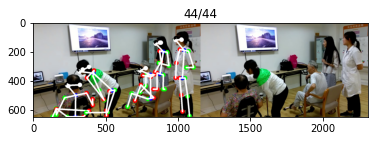

In [ ]:
from torchvision import transforms
import numpy as np

cap = cv2.VideoCapture(fname)
total_frames = int(cap.get(7))
vid = imageio.get_reader(fname, 'ffmpeg')
print('No. of frames = ', total_frames)
fps = vid.get_meta_data()['fps']
writer = imageio.get_writer(fname1, fps=fps)
frame_count = 1
try:
  while(frame_count <= total_frames):
    display.clear_output(wait=True)
    plt.title(str(frame_count)+'/'+str(total_frames))
    frame = vid.get_data(frame_count)  # Capture frame-by-frame
    img0 = np.copy(frame)
    transform = transforms.Compose([transforms.ToTensor()]) # Defing PyTorch Transform
    img = transform(frame).to(device) # Apply the transform to the image
    pred = model([img]) # Pass the image to the model
    kp = pred[0]['keypoints'].cpu().detach().numpy() #keypoints
    pred_score = list(pred[0]['scores'].cpu().detach().numpy())

    # 只取 score > threshold
    threshold = 0.9
    i = 0
    while i < len(pred_score):
      if (pred_score[i] < threshold):
        break
      i = i + 1
    kp = kp[:i]
    
    for person_idx in range(kp.shape[0]):
      draw_skeleton(frame_count, frame, kp[person_idx])
    img1 = np.append(frame,img0, axis=1)#把 2 張 img 接起來
    writer.append_data(img1)
    frame_count += 1
    plt.imshow(img1)
    plt.pause(0.1)
except:
    print("Read video error!")
writer.close()